# step 1 Business Understanding
* The objective of this analysis is to gain insights into customer behavior and restaurant performance using Zomato's restaurant dataset.

* This will help restaurant owners and Zomato understand which factors influence ratings, customer preferences, and business growth.

* Key areas of focus include cost analysis, cuisine trends, service availability, and location-based performance.

* The findings from this analysis can support strategic decisions such as pricing, marketing, and service improvement for better customer engagement and revenue

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\zomato.csv.zip",encoding = 'latin1') 
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Data EXploration 

In [4]:
df.shape

(9551, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [7]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [8]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Data Cleaning

In [10]:
df.rename(columns = {'Restaurant ID':'Restaurant_ID','Restaurant Name':'Restaurant_Name',
                     'Country Code':'Country_Code','Locality Verbose':'Locality_Verbose',
                    'Average Cost for two':'Average_Cost_for_two','Has Table booking':'Has_Table_booking',
                    'Has Online delivery':'Has_Online_delivery','Is delivering now':'Is_delivering_now',
                    'Switch to order menu':'Switch_to_order_menu','Price range':'Price_range','Aggregate rating':'Aggregate_rating',
                    'Rating color':'Rating_color','Rating text':'Rating_text'},inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.head(1)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9551 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Is_delivering_now     9551 non-null   object 
 15  Switch_to_order_menu 

In [14]:
continious = ['Restaurant_ID','Country_Code','Latitude','Longitude','Average_Cost_for_two','Price_range']

categorical = []

count = []

In [15]:
df.Cuisines.fillna(df.Cuisines.mode()[0],inplace = True) # fill the missing values 

In [16]:
(df.Average_Cost_for_two>10000).sum()

21

In [17]:
df

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [18]:
df.Average_Cost_for_two.unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [19]:
df.columns 

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

# Data Analysis

In [20]:
df.head(2)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [21]:
df.sort_values('Aggregate_rating',ascending = False).head(10)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
1381,18384115,Caterspoint,1,Gurgaon,"S-27/11, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.103974,28.487264,"Mexican, American, Healthy Food",500,Indian Rupees(Rs.),No,Yes,No,No,2,4.9,Dark Green,Excellent,223
589,18269368,AB's Absolute Barbecues,214,Dubai,"Mezzanaine Floor, Centurion Star Tower, Deira ...",Deira City Centre Area,"Deira City Centre Area, Dubai",55.328740,25.254105,"Continental, Indian",160,Emirati Diram(AED),Yes,No,No,No,3,4.9,Dark Green,Excellent,641
374,17580142,McGuire's Irish Pub & Brewery,216,Pensacola,"600 E Gregory Street, Pensacola, FL 32502",Pensacola,"Pensacola, Pensacola",-87.202700,30.417900,"Burger, Bar Food, Steak",40,Dollar($),No,No,No,No,3,4.9,Dark Green,Excellent,2238
9303,18217279,Miann,148,Auckland,"57 Fort Street, Auckland Auckland CBD",Fort Street,"Fort Street, Auckland",174.768986,-36.846050,Desserts,25,NewZealand($),No,No,No,No,1,4.9,Dark Green,Excellent,281
9299,7001086,Milse,148,Auckland,"The Pavilions, 27 Tyler Street, Britomart, Auc...",Britomart,"Britomart, Auckland",174.768690,-36.844188,Desserts,50,NewZealand($),No,No,No,No,3,4.9,Dark Green,Excellent,754
9296,7417450,Talaga Sampireun,94,Tangerang,"Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...",Pondok Aren,"Pondok Aren, Tangerang",106.726119,-6.269914,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,2212
50,7300515,Garota de Ipanema,30,Rio de Janeiro,"Rua Vinicius de Moraes, 49, Ipanema, Rio de Ja...",Ipanema,"Ipanema, Rio de Janeiro",-43.203000,-22.985333,"Brazilian, Bar Food",120,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,49
9291,7417455,Talaga Sampireun,94,Jakarta,"Taman Impian Jaya Ancol, Jl. Lapangan Golf 7, ...","Taman Impian Jaya Ancol, Ancol","Taman Impian Jaya Ancol, Ancol, Jakarta",106.833553,-6.126860,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,1640
48,7300955,Braseiro da Gíçvea,30,Rio de Janeiro,"Praí_a Santos Dumont, 116, Gíçvea, Rio de Janeiro",Gíçvea,"Gíçvea, Rio de Janeiro",-43.227042,-22.973507,"Brazilian, Bar Food",100,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,40
428,17142792,Mama's Fish House,216,Rest of Hawaii,"799 Poho Pl, Paia, HI 96779",Paia,"Paia, Rest of Hawaii",-156.366445,20.929622,"Hawaiian, Seafood",70,Dollar($),No,No,No,No,4,4.9,Dark Green,Excellent,1343


### these restaurents get more rating

In [22]:
df.head(2)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [23]:
df.City.value_counts()

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [24]:
df.groupby('City')['Aggregate_rating'].mean()

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
ÛÁstanbul          4.292857
Name: Aggregate_rating, Length: 141, dtype: float64

In [25]:
city_avg=  df.groupby('City')['Aggregate_rating'].mean().reset_index()
city_avg

,City,Aggregate_rating
0,Abu Dhabi,4.300000
1,Agra,3.965000
2,Ahmedabad,4.161905
3,Albany,3.555000
4,Allahabad,3.395000
...,...,...
136,Weirton,3.900000
137,Wellington City,4.250000
138,Winchester Bay,3.200000
139,Yorkton,3.300000


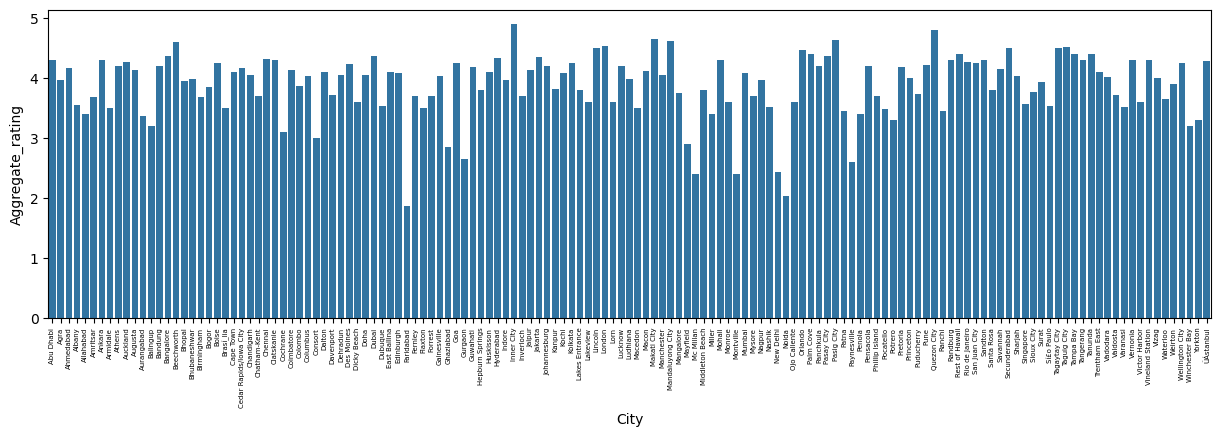

In [26]:
plt.figure(figsize = (15,4))
sns.barplot(data=city_avg , x = 'City' ,y = 'Aggregate_rating' )
plt.xticks(rotation=90,fontsize = 5)
plt.show()

In [27]:
avg_cost = df.groupby('City')['Average_Cost_for_two'].mean().reset_index()
avg_cost

,City,Average_Cost_for_two
0,Abu Dhabi,182.000000
1,Agra,1065.000000
2,Ahmedabad,857.142857
3,Albany,19.750000
4,Allahabad,517.500000
...,...,...
136,Weirton,25.000000
137,Wellington City,71.250000
138,Winchester Bay,25.000000
139,Yorkton,25.000000


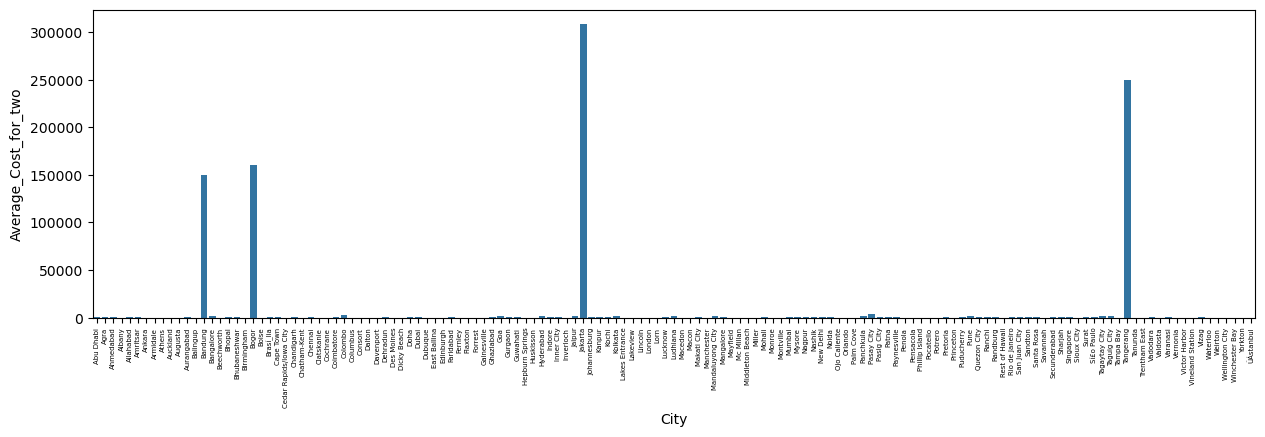

In [28]:
plt.figure(figsize = (15,4))
sns.barplot(data = avg_cost,x = 'City',y = 'Average_Cost_for_two')
plt.xticks(rotation=90,fontsize = 5)
plt.show()

In [29]:
location_based = df['City'].value_counts(ascending = False).head(10).reset_index()
location_based

,City,count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Bhubaneshwar,21
6,Amritsar,21
7,Ahmedabad,21
8,Lucknow,21
9,Guwahati,21


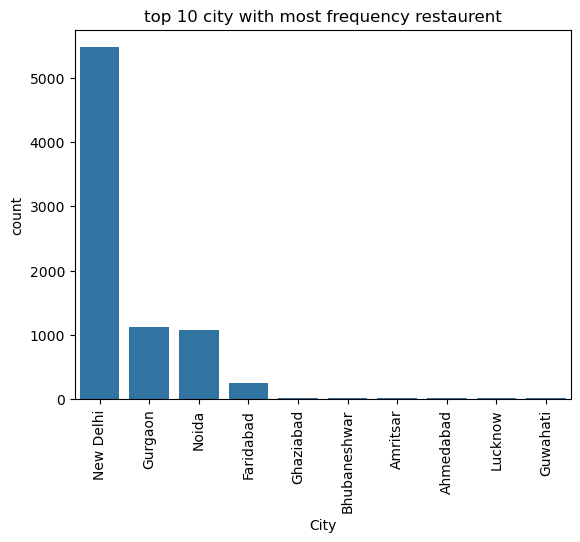

In [30]:
sns.barplot(data =location_based,x ='City',y = 'count'  )
plt.xticks(rotation= 90)
plt.title('top 10 city with most frequency restaurent')
plt.show()

In [31]:
rating = df.Aggregate_rating.value_counts().reset_index()
rating

,Aggregate_rating,count
0,0.0,2148
1,3.2,522
2,3.1,519
3,3.4,498
4,3.3,483
5,3.5,480
6,3.0,468
7,3.6,458
8,3.7,427
9,3.8,400


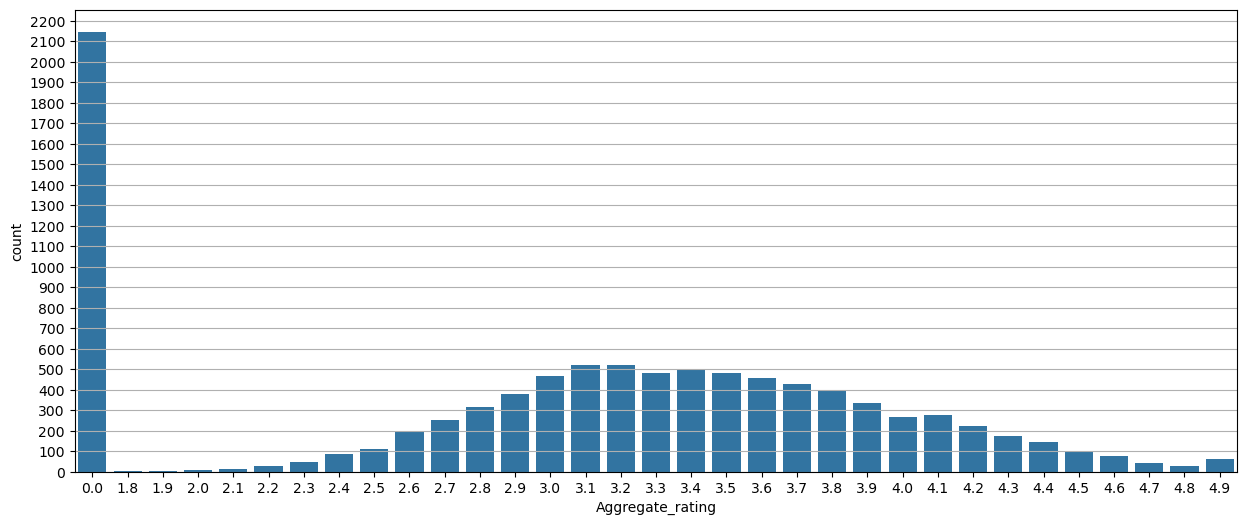

In [32]:
plt.figure(figsize = (15,6))
sns.barplot(data = rating ,x = 'Aggregate_rating',y = 'count')
plt.yticks(range(0,2300,100))
plt.grid(axis = 'y')
plt.show()

In [33]:
df.head(2)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [34]:
df[['Aggregate_rating','Votes']]

,Aggregate_rating,Votes
0,4.8,314
1,4.5,591
2,4.4,270
3,4.9,365
4,4.8,229
...,...,...
9546,4.1,788
9547,4.2,1034
9548,3.7,661
9549,4.0,901


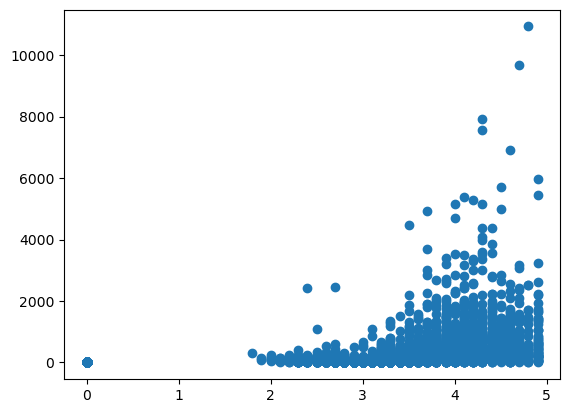

In [39]:
plt.scatter(df.Aggregate_rating,df.Votes)
plt.show()


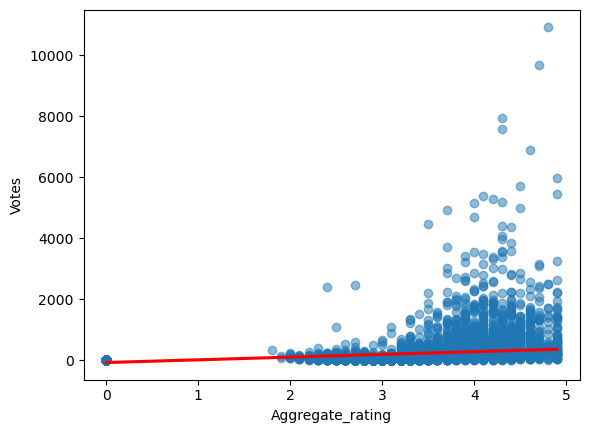

In [49]:
sns.regplot(x='Aggregate_rating', y='Votes', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.show()

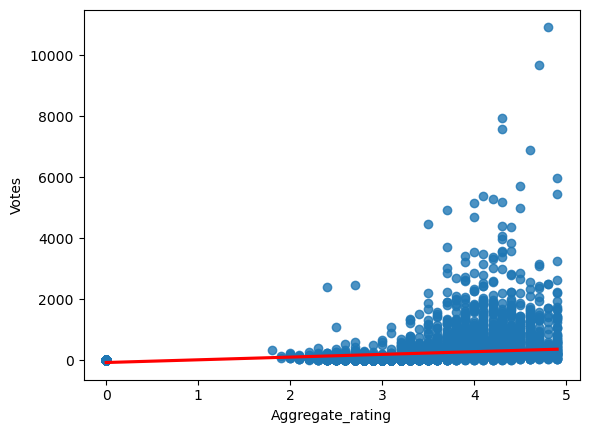

In [42]:
sns.regplot(data = df,x = df.Aggregate_rating, y = df.Votes,line_kws = {'color':'red'})
plt.show()

In [52]:
df.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [58]:
df.Cuisines.value_counts()

Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [68]:
top_10_Cuisines = df.Cuisines.value_counts().head(10)
top_10_Cuisines

Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

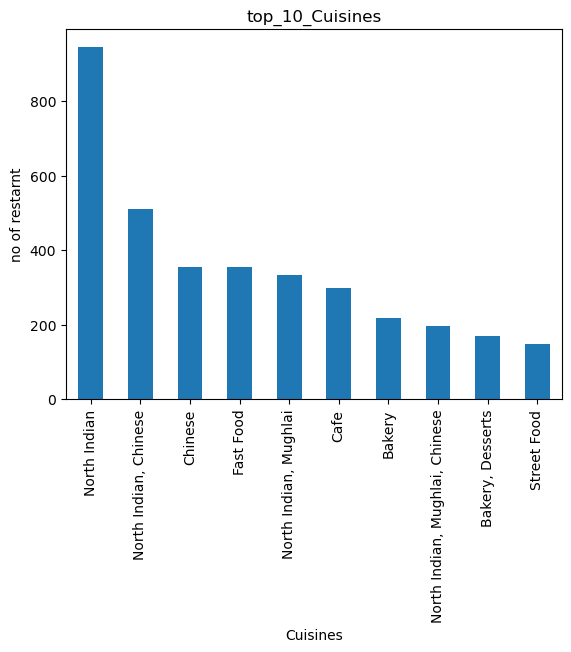

In [78]:
top_10_Cuisines.plot(kind =  'bar')
plt.title('top_10_Cuisines')
plt.ylabel('no of restarnt')
plt.show()